##### 

# Analysis of Intense Precipitation Events

This notebook analyzes and plots precipitation data while aiding in investigating a scientific question regarding hydrological data. 


@author = Kushum Basnet for ESCI 7/896.02  
@date = 2023-03-23   
@license = MIT -- https://opensource.org/licenses/MIT

### Project Background



Climate change is affecting many places around the world causing catstrophic events, such as rising sea levels and shrinking moutain glaciers.This topic is important because it helps water managers, scientists, and engineers prepare for future extreme precipitation events.Also, The data will help to see if climate change will affect more places around the globe.

### Research Question


This notebook investigates if intense precipitation events have been getting more common due to climate change.The specifc research question that will be investigated using this notebook;have intense precipitation events(eg., more than 2" of rain in one day) been getting more common in recent years as an effect of climate change? There will be about three plots and calculations that will help in investigate the scientific question. The plots will be the showing max precipitation during each year, frequency plot of precipitation, and annual average precipitation during long period of record. 

### Site Description


The site for this project will be a precipitation gauge in Boston,MA located in Boston Logan International.The elevation for this site is about 3.2 meters.This site is the main focus because of the high amount of precipitation events occuring in the northeast.Massachusetts has a humid continental climate which is defined as having humid summers,cold and snowy winters, and abundant precipitation. 


### Data Description


The data set that will be used for this project is precipitation data from different scientific sources, such as NOAA.The Station ID for this site is GHCND:USW00014739. The period of record for the data is from 1936 to 2023, which is about 87 years.


In [35]:
# Import libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Part 1 

In [37]:
# Specify Patameters

# Name of input file 
infile_name='Primary_Station.csv'

# Text for figure title for stations 
fig_title="Boston, MA"

# Study period start
start='1936-01-01'

#Study period end 
end= '2023-01-01'

#Study Duration(years)
duration=87

In [38]:
# Load primary station precipitation data

#Load Precipitation file into a dataframe 
data = pd.read_csv(infile_name, 
                  parse_dates=['DATE'], index_col=['DATE'])
# Replace 9999 and T Values with NaN
data.replace([9999,'T',np.nan],0, inplace=True) #Replaces NaN values with 0

# Adding MDPR to precipitation 
if 'MDPR' in data.columns.tolist():#To consider stations not reporting daily
    data['PRCP']= data['PRCP']+ data['MDPR']
    data.drop(columns={'MDPR'}, inplace=True)
    
# Rename Column
data.rename(columns={"PRCP":"precip"},inplace=True)

# Delete unnecessary columns 
data.drop(columns = {"STATION","NAME","SNOW","SNWD",},inplace = True)


In [39]:
# Convert Precipitation unit from inches to millimeters for primary station 

data['precip'] = data['precip'] * 25.4

Text(0.5, 1.0, 'Boston, MA')

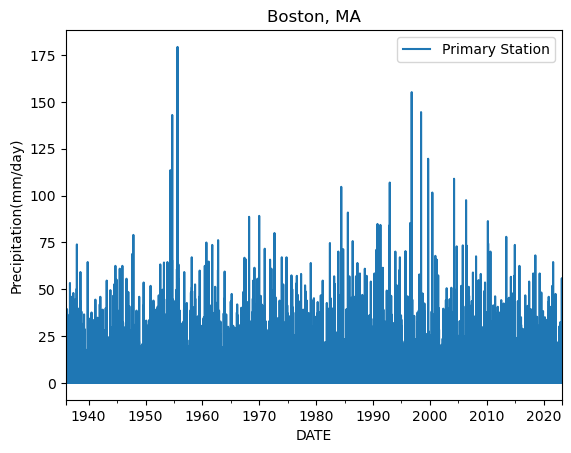

In [40]:
# Plot time series plot

# Create plot to display precipitation station data
fig1, ax = plt.subplots()

# Plot Primary station precipitation data
data.plot( y='precip',ax=ax,label="Primary Station")#x = dataframe index (DATE)

# Add y-axis label    
ax.set_ylabel('Precipitation(mm/day)')   # y = mm/day

# Add plot title
ax.set_title(fig_title)

### Part 2 

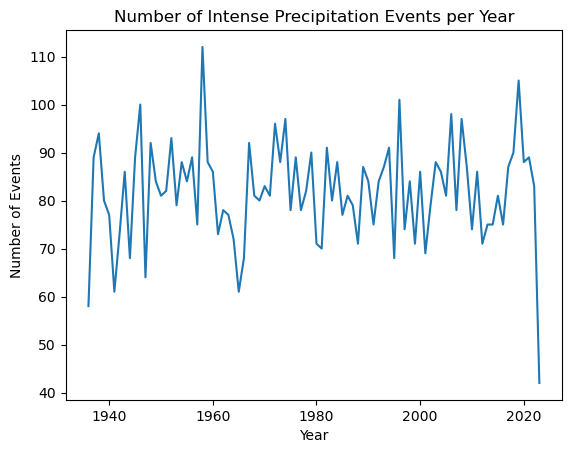

In [19]:
# Find data that include days with more than 2 inches of precipitation
intense_precip = data.loc[data["precip"] > 2]

# Add columns to data frame
data['month']=data.index.month # Adding month column
data['wateryear']=data.index.year #Adding wateryear column
data['dayofyear']=data.index.dayofyear #Adding day of year column

#Converting year to water year
data.loc[data['month']>9,'wateryear']=data.loc[data['month']>9,'wateryear']+1

# Group the data by year and count the number of intense precipitation events for each year
yearly = intense_precip.groupby(intense_precip['wateryear']).size()

# Create a line graph to show the trend of intense precipitation events over time
plt.plot(yearly.index, yearly.values)
plt.title("Number of Intense Precipitation Events per Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.show()
ax.legend()

### Part 3 

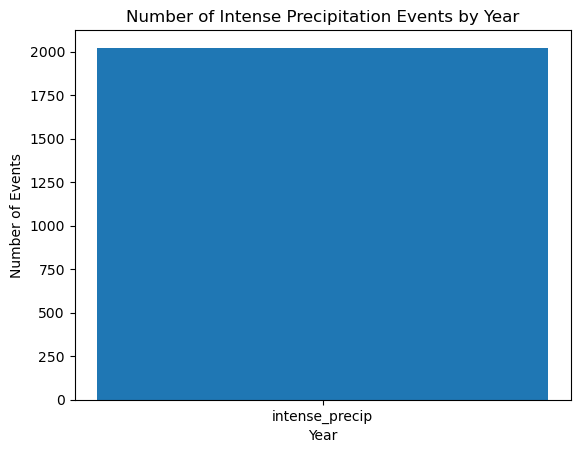

In [31]:
# Create a bar graph to compare the number of intense precipitation events in recent years to earlier years
plt.bar('intense_precip',yearly.index)
plt.title("Number of Intense Precipitation Events by Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.show()

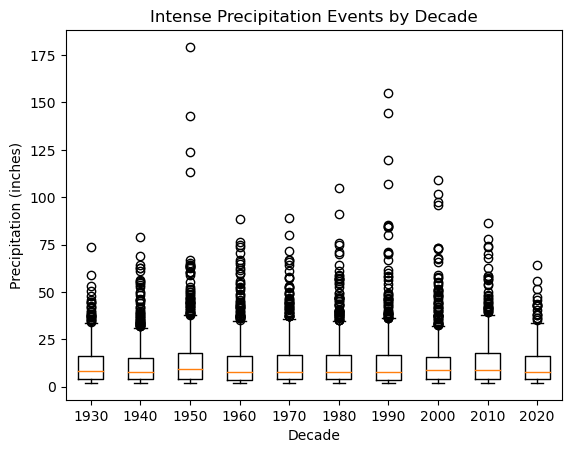

In [34]:
# Group the data by decade and count the number of intense precipitation events for each decade
decade10 = intense_precip.groupby('decade').size()

# Create a box plot of the number of intense precipitation events by decade
plt.boxplot(intense_precip.groupby('decade')['precip'].apply(list))
plt.xticks(range(1, len(decade10) + 1), decade10.index)
plt.title("Intense Precipitation Events by Decade")
plt.xlabel("Decade")
plt.ylabel("Precipitation (inches)")
plt.show()

### Conclusion

#After calculations and plots, the conclusion will be added. 

#Specifics that will be included:trends,patterns,unexpected findings,ways to reduce errors,improving methods,data supporting research question,conclusions from data, etc.